## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import random
from tqdm import tqdm
import matplotlib.pyplot as plt

## Loading Data

In [2]:
data = pd.read_csv('mnist_train.csv')

In [3]:
data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
training_data = np.array(data)
training_data

array([[5, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [4, 0, 0, ..., 0, 0, 0],
       ...,
       [5, 0, 0, ..., 0, 0, 0],
       [6, 0, 0, ..., 0, 0, 0],
       [8, 0, 0, ..., 0, 0, 0]])

In [5]:
training_data.shape

(60000, 785)

In [6]:
np.random.shuffle(training_data)

In [7]:
y_train = training_data[:, 0]
X_train = training_data[:, 1:]

In [8]:
y_train.shape

(60000,)

In [9]:
X_train.shape

(60000, 784)

In [10]:
test_data = pd.read_csv('mnist_test.csv')

In [11]:
test_data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
testing_data = np.array(test_data)
testing_data

array([[7, 0, 0, ..., 0, 0, 0],
       [2, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [4, 0, 0, ..., 0, 0, 0],
       [5, 0, 0, ..., 0, 0, 0],
       [6, 0, 0, ..., 0, 0, 0]])

In [13]:
testing_data.shape

(10000, 785)

In [14]:
np.random.shuffle(testing_data)

In [15]:
y_test = testing_data[:, 0]
X_test = testing_data[:, 1:]

In [16]:
X_test.shape

(10000, 784)

In [17]:
y_test.shape

(10000,)

In [18]:
class MyNeuralNetwork:
    def __init__(self, input_size = 784, hidden_layers=[512, 512], output_size = 10):
        self.input_size = input_size
        self.hidden_layers = hidden_layers
        self.output_size = output_size
        self.weights = []
        self.biases = []
        self.gradientsWeights = []
        self.gradientsBiases = []
        self.iterations = 0
        # self.seed = 0

        # np.random.seed(self.seed)

        # Initializing weights and biases

        # Connection between Input Layer and First Hidden Layer
        self.weights.append(0.01 * np.random.randn(input_size, hidden_layers[0]))
        self.biases.append(np.zeros((1, hidden_layers[0])))

        # Connection between Hidden Layer 1 and Hidden Layer 2
        self.weights.append(0.01 * np.random.randn(hidden_layers[0], hidden_layers[1]))
        self.biases.append(np.zeros((1, hidden_layers[1])))

        # Connection between Hidden Layer 2 and Output Layer
        self.weights.append(0.01 * np.random.randn(hidden_layers[1], output_size))
        self.biases.append(np.zeros((1, output_size)))

    def forward(self, inputs):
        self.outputs = [inputs]
        self.outputsTesting = ["inputs"]

        for i in range(len(self.weights)):
            self.outputs.append(np.dot(self.outputs[-1], self.weights[i]) + self.biases[i])

            # Apply Softmax Activation to the Output Layer
            if i == len(self.weights) - 1:
                finalOutput = np.exp(self.outputs[-1] - np.max(self.outputs[-1], axis=1, keepdims=True))
                finalOutput = finalOutput / np.sum(finalOutput, axis=1, keepdims=True)
                self.outputs.append(finalOutput)
            # Apply ReLU Activation to the rest of the layers
            else:
                self.outputs.append(np.maximum(0, self.outputs[-1]))
        
        return self.outputs[-1]
    
    def backward(self, y_true):
        self.gradientsWeights = []
        self.gradientsBiases = []
        
        # Number of samples
        samples = len(self.outputs[-1])

        # If labels are one-hot encoded,
        # turn them into discrete values
        if len(y_true.shape) == 2:
            print("Chaning to Discrete Values")
            y_true = np.argmax(y_true, axis=1)

        # Copy so we can safely modify
        dSoftMaxCrossEntropy = self.outputs[-1].copy()
        # Calculate gradient
        dSoftMaxCrossEntropy[range(samples), y_true] -= 1
        # Normalize gradient
        dSoftMaxCrossEntropy = dSoftMaxCrossEntropy / samples
        # print(dSoftMaxCrossEntropy)

        # Calculate gradients -> Calcualte derivative of weights, biases, and inputs (to continue to backpropagate)
        dInputs = np.dot(dSoftMaxCrossEntropy.copy(), self.weights[-1].T)

        dWeights = np.dot(self.outputs[-3].T, dSoftMaxCrossEntropy.copy())
        dBiases = np.sum(dSoftMaxCrossEntropy.copy(), axis=0, keepdims=True)
        self.gradientsWeights = [dWeights] + self.gradientsWeights
        self.gradientsBiases = [dBiases] + self.gradientsBiases


        i = -3
        j = -1
        for _ in range(len(self.hidden_layers)):
            i -= 1
            j -= 1
            
            # ReLU activation Function
            dInputsReLU = dInputs.copy()
            dInputsReLU[self.outputs[i] <= 0] = 0
            
            i -= 1
            dInputs = np.dot(dInputsReLU, self.weights[j].T)
            dWeights = np.dot(self.outputs[i].T, dInputsReLU)
            dBiases = np.sum(dInputsReLU, axis=0, keepdims=True)
            self.gradientsWeights = [dWeights] + self.gradientsWeights
            self.gradientsBiases = [dBiases] + self.gradientsBiases
    
    # def updateParams(self, lr=0.05, decay=1e-7):
    #     lr = lr * (1. / (1. + decay * self.iterations))

    #     for i in range(len(self.weights) - 1):
    #         if i != len(self.weights)-1:
    #             assert self.weights[i].shape == self.gradientsWeights[i].shape
    #             self.weights[i] += -lr*(self.gradientsWeights[i])

    #     for i in range(len(self.biases) - 1):
    #         if i != len(self.biases)-1:
    #             assert self.biases[i].shape == self.gradientsBiases[i].shape
    #             self.biases[i] += -lr*(self.gradientsBiases[i])

    #     self.iterations += 1
    def updateParams(self, lr=0.05, decay=1e-7):
        lr = lr * (1. / (1. + decay * self.iterations))

        for i in range(len(self.weights)):
            assert self.weights[i].shape == self.gradientsWeights[i].shape
            self.weights[i] += -lr * self.gradientsWeights[i]

        for i in range(len(self.biases)):
            assert self.biases[i].shape == self.gradientsBiases[i].shape
            self.biases[i] += -lr * self.gradientsBiases[i]

        self.iterations += 1


    def LossCategoricalCrossEntropy(self, yPred, yTrue):
        # If predicted class has a prediction of 0% likelihood this prevents log(0), which would be infinity
        yPred = np.clip(yPred, 1e-10, 1 - 1e-10)
        # We calculate the sum of the log losses
        loss = -np.sum(yTrue * np.log(yPred), axis=1)
        # We calculate the average loss - this depends on the number of samples
        # So the return loss is the average loss not the summed up loss (which took me a while to understand)
        average_loss = np.mean(loss)
        return average_loss
    
    def sparse_to_one_hot(self, sparse_labels, num_classes):
        one_hot_encoded = np.zeros((len(sparse_labels), num_classes))
        one_hot_encoded[np.arange(len(sparse_labels)), sparse_labels] = 1
        return one_hot_encoded
    
    def train(self, data, data_labels, epochs, lr, batch_size=32, decay=1e-6):
        # Normalize and reshape data
        data = (data.astype(np.float32) - 127.5) / 127.5
        data = data.reshape(len(data), self.input_size)

        # Initialize lists to store accuracies and losses
        self.accuracies = []
        self.losses = []

        for epoch in range(1, epochs + 1):
            print(f'Epoch {epoch}/{epochs}')
            train_steps = len(data) // batch_size

            # Shuffle data at the beginning of each epoch
            indices = np.arange(len(data))
            np.random.shuffle(indices)
            data = data[indices]
            data_labels = data_labels[indices]

            # Initialize progress bar for the current epoch
            with tqdm(total=train_steps, desc=f"Epoch {epoch}", unit='batch') as pbar:

                for step in range(train_steps):
                    # Batch selection
                    batch_X = data[step * batch_size:(step + 1) * batch_size]
                    batch_y = data_labels[step * batch_size:(step + 1) * batch_size]

                    # Forward pass
                    output = self.forward(batch_X)

                    # Backward pass
                    self.backward(batch_y)
                    # Update weights and biases
                    self.updateParams(lr=lr, decay=decay)

                    # Calculate accuracy and loss every 100 steps or at the last step
                    if step % 100 == 0 or step == train_steps - 1:
                        predictions = np.argmax(output, axis=1)
                        y = batch_y if len(batch_y.shape) == 1 else np.argmax(batch_y, axis=1)
                        accuracy = np.mean(predictions == y)
                        loss = self.LossCategoricalCrossEntropy(
                            output, self.sparse_to_one_hot(y, self.output_size)
                        )
                        # Append to the instance variables
                        self.accuracies.append(accuracy)
                        self.losses.append(loss)
                        # Update progress bar description
                        pbar.set_postfix({'loss': f'{loss:.3f}', 'acc': f'{accuracy:.3f}'})

                    # Update the progress bar
                    pbar.update(1)

## Training 3 Networks

In [19]:
myNeuralNet = MyNeuralNetwork(hidden_layers=[128, 128])
myNeuralNet.train(data = X_train,
                  data_labels = y_train,
                  epochs = 5,
                  lr=0.01)

Epoch 1/5


Epoch 1: 100%|██████████| 1875/1875 [00:02<00:00, 658.10batch/s, loss=0.708, acc=0.750]


Epoch 2/5


Epoch 2: 100%|██████████| 1875/1875 [00:01<00:00, 1061.05batch/s, loss=0.494, acc=0.875]


Epoch 3/5


Epoch 3: 100%|██████████| 1875/1875 [00:02<00:00, 689.18batch/s, loss=0.274, acc=0.906]


Epoch 4/5


Epoch 4: 100%|██████████| 1875/1875 [00:02<00:00, 794.62batch/s, loss=0.124, acc=0.938]


Epoch 5/5


Epoch 5: 100%|██████████| 1875/1875 [00:02<00:00, 867.02batch/s, loss=0.139, acc=0.906]


In [20]:
myBiggerNeuralNet = MyNeuralNetwork(hidden_layers=[512, 512])
myBiggerNeuralNet.train(data = X_train,
                  data_labels = y_train,
                  epochs = 5,
                  lr=0.01)

Epoch 1/5


Epoch 1: 100%|██████████| 1875/1875 [00:10<00:00, 177.07batch/s, loss=1.042, acc=0.781]


Epoch 2/5


Epoch 2: 100%|██████████| 1875/1875 [00:09<00:00, 188.20batch/s, loss=0.510, acc=0.875]


Epoch 3/5


Epoch 3: 100%|██████████| 1875/1875 [00:09<00:00, 192.18batch/s, loss=0.118, acc=0.969]


Epoch 4/5


Epoch 4: 100%|██████████| 1875/1875 [00:10<00:00, 179.16batch/s, loss=0.243, acc=0.938]


Epoch 5/5


Epoch 5: 100%|██████████| 1875/1875 [00:10<00:00, 183.05batch/s, loss=0.125, acc=0.969]


In [21]:
myBiggerNeuralNet2 = MyNeuralNetwork(hidden_layers=[1024, 512])
myBiggerNeuralNet2.train(data = X_train,
                  data_labels = y_train,
                  epochs = 5,
                  lr=0.01)

Epoch 1/5


Epoch 1: 100%|██████████| 1875/1875 [00:21<00:00, 86.20batch/s, loss=0.521, acc=0.875] 


Epoch 2/5


Epoch 2: 100%|██████████| 1875/1875 [00:20<00:00, 93.12batch/s, loss=0.416, acc=0.875] 


Epoch 3/5


Epoch 3: 100%|██████████| 1875/1875 [00:18<00:00, 98.95batch/s, loss=0.335, acc=0.938] 


Epoch 4/5


Epoch 4: 100%|██████████| 1875/1875 [00:18<00:00, 100.44batch/s, loss=0.183, acc=0.938]


Epoch 5/5


Epoch 5: 100%|██████████| 1875/1875 [00:17<00:00, 105.10batch/s, loss=0.204, acc=0.969]


## Making Predictions

In [22]:
def random_image_generator(n, X, y_true, model, seed=None):
    """
    Displays n random images from dataset X with their corresponding true labels, predicted labels,
    and confidence percentages. The predicted label and confidence are shown in green if correct,
    and in red if incorrect.

    Parameters:
    - n (int): Number of images to display.
    - X (numpy array): Dataset of images.
    - y_true (numpy array): True labels.
    - model: Trained model used for making predictions.
    - seed (int, optional): Random seed for reproducibility.
    """
    if seed is not None:
        random.seed(seed)
        np.random.seed(seed)
    
    # Ensure n does not exceed the number of samples in X
    n = min(n, len(X))
    
    # Generate n unique random indices
    idx = random.sample(range(len(X)), n)
    
    # Select the images and labels for the chosen indices
    X_selected = X[idx]
    y_true_selected = y_true[idx]
    
    # Preprocess the selected images 
    X_processed = (X_selected.astype(np.float32) - 127.5) / 127.5
    X_processed = X_processed.reshape(len(X_selected), -1)
    
    # Get predicted probabilities from the model
    # Also make predictions from them
    pred_prob = model.forward(X_processed)
    y_pred = np.argmax(pred_prob, axis=1)
    
    fig, axes = plt.subplots(1, n, figsize=(n * 2.5, 3))
    
    if n == 1:
        axes = [axes]
    
    for i, ax in enumerate(axes):
        image = X_selected[i]
        true_label = y_true_selected[i]
        predicted_label = y_pred[i]
        confidence = pred_prob[i][predicted_label] * 100  
        

        is_correct = predicted_label == true_label
        color = 'green' if is_correct else 'red'
        

        if image.size == 784:
            image = image.reshape(28, 28)
        ax.imshow(image, cmap='gray')
        ax.axis('off')
        
        # Adding Lables and Predictions
        ax.set_title(f"True: {true_label}", fontsize=12)
        ax.text(0.5, -0.15, 
                f"Pred: {predicted_label}\nConf: {confidence:.1f}%", 
                fontsize=12, color=color, ha='center', va='top', transform=ax.transAxes)
    
    plt.tight_layout()
    plt.show()


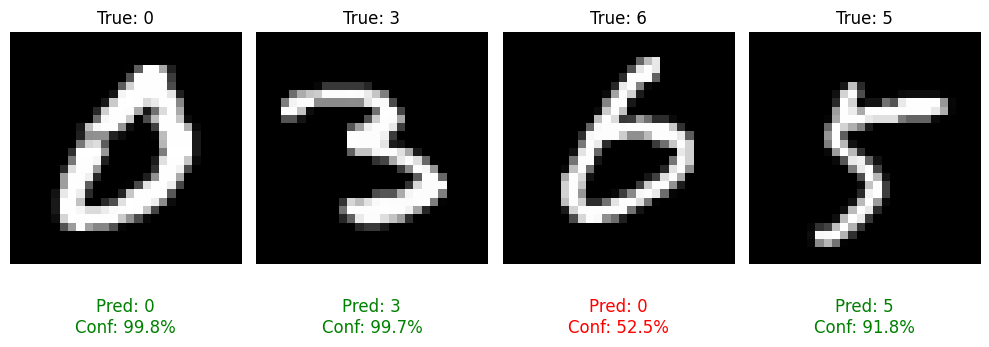

In [23]:
random_image_generator(n=4,
                       X=X_test,
                       y_true=y_test,
                       model=myBiggerNeuralNet)

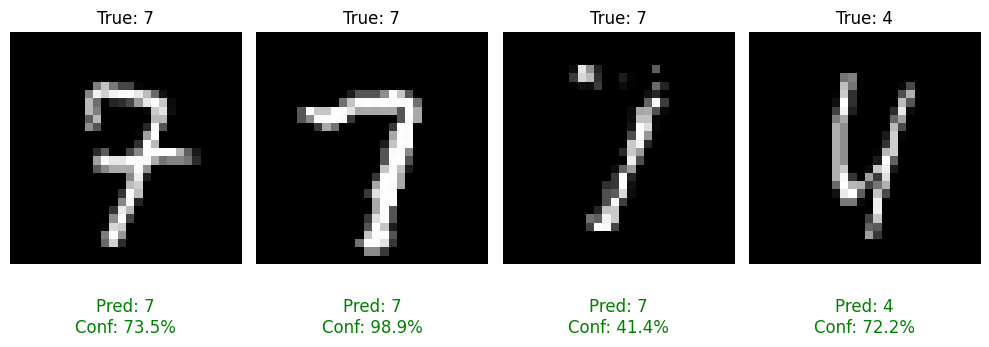

In [24]:
random_image_generator(n=4,
                       X=X_test,
                       y_true=y_test,
                       model=myNeuralNet)

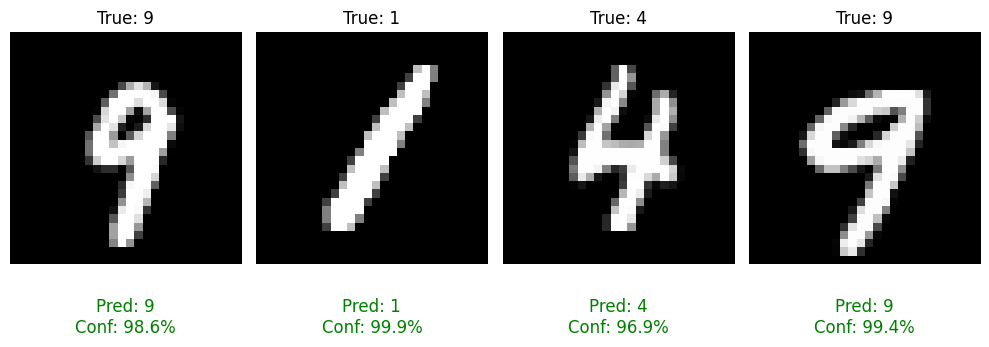

In [25]:
random_image_generator(n=4,
                       X=X_test,
                       y_true=y_test,
                       model=myBiggerNeuralNet2)

## Loss Curves

In [26]:
def plot_training_curves(model):
    """
    Plots the loss and accuracy curves of the model during training.

    Parameters:
    - model: The trained model instance with stored accuracies and losses.
    """
    # Edge Case (Because why not?)
    if not hasattr(model, 'losses') or not hasattr(model, 'accuracies'):
        print("The model does not have training history data to plot.")
        return


    fig, ax1 = plt.subplots(figsize=(10, 5))

    # Plot loss curve
    color = 'tab:red'
    ax1.set_xlabel('Training Steps')
    ax1.set_ylabel('Loss', color=color)
    ax1.plot(model.losses, color=color, label='Loss')
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.legend(loc='upper left')

    # Create a second y-axis for accuracy
    ax2 = ax1.twinx()
    color = 'tab:blue'
    ax2.set_ylabel('Accuracy', color=color)
    ax2.plot(model.accuracies, color=color, label='Accuracy')
    ax2.tick_params(axis='y', labelcolor=color)
    ax2.legend(loc='upper right')

    # Add a title and show the plot
    plt.title('Training Loss and Accuracy Curves')
    plt.show()

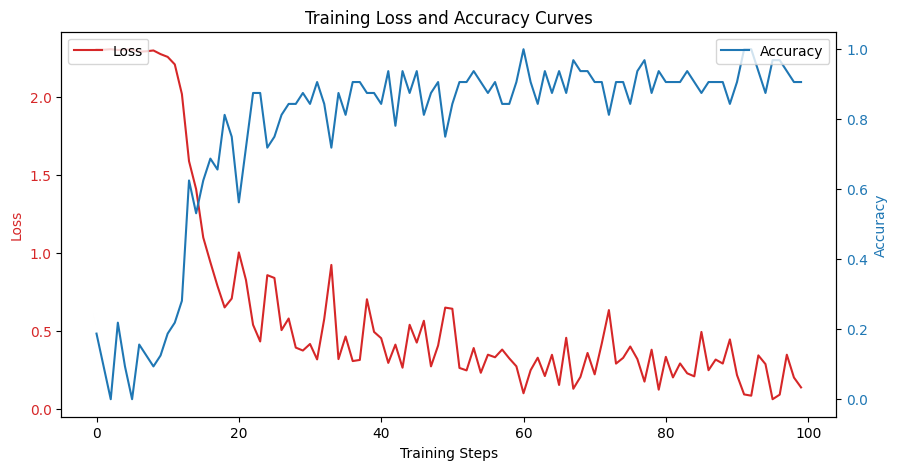

In [27]:
plot_training_curves(myNeuralNet)

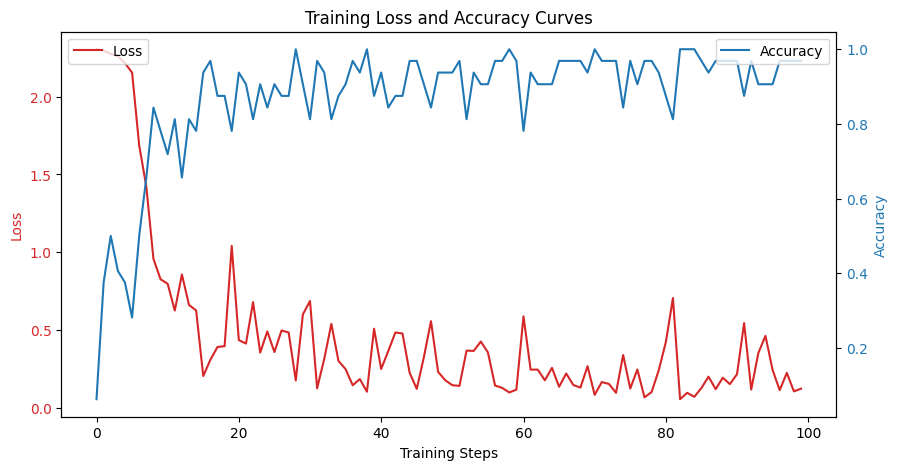

In [28]:
plot_training_curves(myBiggerNeuralNet)

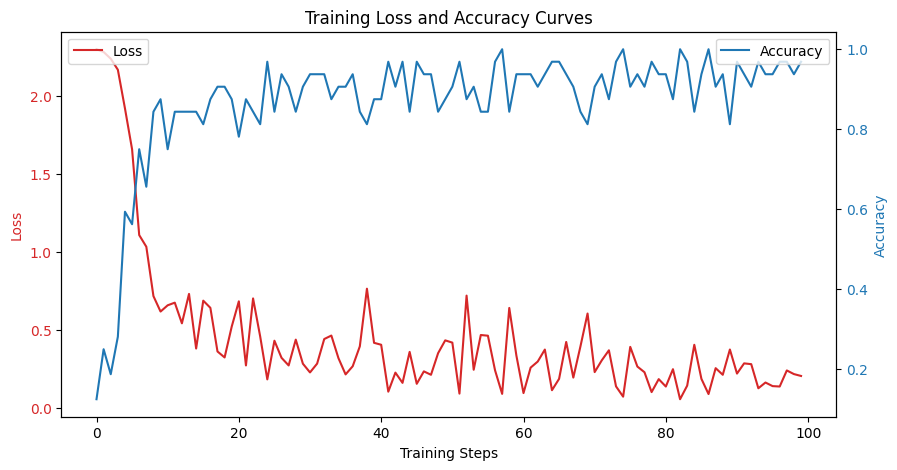

In [29]:
plot_training_curves(myBiggerNeuralNet2)